- RAG Agent 구성
- zerox -> PDF 전처리

In [12]:
%pip install -qU pypdf langchain-community langchain-text-splitters


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


- `PyPDFLoader`를 사용하여 전처리된 데이터 확인

In [13]:
from langchain_community.document_loaders import PyPDFLoader
pdf_file_path = "./income_tax.pdf"
loader = PyPDFLoader(pdf_file_path)

pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [14]:
pages[34]

Document(metadata={'source': './income_tax.pdf', 'page': 34, 'page_label': '35'}, page_content='법제처                                                            35                                                       국가법령정보센터\n소득세법\n[전문개정 2009. 12. 31.]\n \n제54조(종합소득공제 등의 배제) ① 분리과세이자소득, 분리과세배당소득, 분리과세연금소득과 분리과세기타소득만이\n있는 자에 대해서는 종합소득공제를 적용하지 아니한다. <개정 2013. 1. 1.>\n② 제70조제1항, 제70조의2제2항 또는 제74조에 따라 과세표준확정신고를 하여야 할 자가 제70조제4항제1호에 따\n른 서류를 제출하지 아니한 경우에는 기본공제 중 거주자 본인에 대한 분(分)과 제59조의4제9항에 따른 표준세액공\n제만을 공제한다. 다만, 과세표준확정신고 여부와 관계없이 그 서류를 나중에 제출한 경우에는 그러하지 아니하다.\n<개정 2013. 1. 1., 2014. 1. 1.>\n③ 제82조에 따른 수시부과 결정의 경우에는 기본공제 중 거주자 본인에 대한 분(分)만을 공제한다.\n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n \n제54조의2(공동사업에 대한 소득공제 등 특례) 제51조의3 또는 「조세특례제한법」에 따른 소득공제를 적용하거나 제\n59조의3에 따른 세액공제를 적용하는 경우 제43조제3항에 따라 소득금액이 주된 공동사업자의 소득금액에 합산과\n세되는 특수관계인이 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액이 있으면 주된 공동사업자의 소득에 합산과세되는 소득\n금액의 한도에서 주된 공동사업자가 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액으로 보아 주된 공동사업자의 합산과세되\n는 종합소득금액 또는 종합소득산출세액을 계산할 때에 소득공제 또는 세액공제를 받을 수 있다. <

- 데이터 전처리 위한 `py-zerox` 설치

In [15]:
%pip install -q py-zerox


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
from dotenv import load_dotenv

load_dotenv()

True

- Notebook에서 `asyncio` 모듈을 사용하기 위해 `nest_asyncio` 설치

In [51]:
%pip install -q nest_asyncio


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import nest_asyncio
nest_asyncio.apply()

- `py-zerox` 모듈을 사용하여 PDF 전처리

In [54]:
from pyzerox import zerox
import os
import json
import asyncio

### 모델 설정 (Vision 모델만 사용) 참고: https://docs.litellm.ai/docs/providers ###

## 일부 모델에 필요할 수 있는 추가 모델 kwargs의 자리 표시자
kwargs = {}

## Vision 모델에 사용할 시스템 프롬프트
custom_system_prompt = None


model = "gpt-4o-mini" ## openai model

# 메인 비동기 진입점을 정의
async def main():
    file_path = "./documents/income_tax.pdf" ## 로컬 파일 경로 및 파일 URL 지원

    ## 일부 페이지 또는 전체 페이지를 처리
    select_pages = None ## 전체는 None, 특정 페이지는 int 또는 list(int) 페이지 번호 (1부터 시작)

    output_dir = "./documents" ## 통합된 마크다운 파일을 저장할 디렉토리
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt, select_pages=select_pages, **kwargs)
    return result


# 메인 함수 실행 :
result = asyncio.run(main())

# 마크 다운 결과 출력
print(result)

ZeroxOutput(completion_time=325104.505, file_name='income_tax', input_tokens=158270, output_tokens=135230, pages=[Page(content='# 소득세법\n\n[시행 2025. 1. 1.] [법률 제20615호, 2024. 12. 31., 일부개정]\n\n기획재정부(세제실세제과) 044-215-4312  \n기획재정부(소득세제과소득) 044-215-4216  \n기획재정부(증여세제과) 044-215-4233  \n기획재정부(소득세과사원소득, 기타소득) 044-215-4217  \n\n## 제1장 총칙\n\n### 제1조(목적)\n\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 과세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.  \n[본조신설 2009. 12. 31.]  \n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]\n\n### 제2조(정의)\n\n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27., 2014. 12. 23., 2018. 12. 31.>  \n1. "거주자"란 국내에 주소를 두거나 183일 이상 거소(居所)를 둔 개인을 말한다.  \n2. "비거주자"란 거주자가 아닌 개인을 말한다.  \n3. "국내거주자"란 법인세법 제2조제1호에 따른 내국법인을 말한다.  \n4. "외국법인"이란 법인세법 제2조제3호에 따른 외국법인을 말한다.  \n5. "사망자"란 사망소득이 있는 거주자를 말한다.  \n6. 제1항에 따른 소득ㆍ가소득자ㆍ비거주자의 구분은 대통령령으로 정한다.  \n[본조신설 2009. 12. 31.]\n\n### 제2조(납세의무)\n\n다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.  \n1. 거주자  \n2. 비거주자  \n3. 내국법인  \n4. 외국법인에 국내사업장(

- zerox를 활용한 전처리 후 생성된 마크다운 파일을 LangGraph에서 활용하기 위해 unstructured 패키지를 설치합니다
- UnstructuredMarkdownLoader를 사용해 전처리된 데이터를 확인합니다
    - loader활용 시 테이블 구조가 사라지는 것을 확인할 수 있습니다

In [21]:
%pip install -q "unstructured[md]" nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


PDFLoader와 달리 TextSplitter를 사용해 청크(chunks)로 분할 필요

In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 100,
    separators=['\n\n', '\n']
)

In [23]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [24]:
document_list[43]

Document(metadata={'source': './documents/income_tax.md'}, page_content='③ 제1항에 따라 종합소득세 산출세액에 공제할 수 있는 금액은 다음 계산식에 따른 금액(이하 이 항에서 “공제금액”이라 한다)을 포함한다. 이 경우 제20제조소득의 금액에 해당 계세기란 제37조에 관한 제1호금아요조차하고 공제로서 금액은 해당 과세기간이 다음 세제기한이 개시일부터 10일 이내에 끝나는 과세기간으로 일응하여 그 이래된 과세기간에 공제된 금액에 내에서 공제할 수 있다.\n\n공제한금액 = A × B / C\n\nA: 제58조에 따라 계산한 총과세표준과 종합소득세액\n\nB: 간접투자회사 등으로부터 지급받은 소득(세후기준가액에 해당 간접투자회사 인세액이 제외된 것을 포함한다)\n\nC: 해당 과세기간의 총과세표준\n\n④ 제58조 제3항에 따른 간접투자회사 등으로부터 지급받은 소득의 계산방법, 그 밖에 세목에서 필요한 사항은 대통령령으로 정한다. [본신실 2022. 12. 31.]\n\n제58조(제세혼소세액의 공제)\n\n① 사각자가 해당 과세기한에 천재지변이나 그 밖의 재해(이하 “재해”라 한다)로 대출금령으로 정하는 자산을 손실할 경우에 이하여 “자산손실”이라 한단의 100면 이상에 해당하는 자산을 상승할여 내과가로 곤란하다고 인정되는 경우에는 다음 각 호의 소득세액(발상소득에 대한 소득세액을 말한다. 이하 이 조에서 같이한 상실될 개별적인 자산의 가액을 한도로 한다)을 시정에 공제한다. 이 경우 자산손실을 포함하지 않으며 아니한다. <개정 2020. 12. 29.>\n\n재해 발생일 전후 매차로 나타난 소득세 부과본 소득세액 미비된 소득세액\n\n재해 발생일에 흥착는 과세기간의 소득에 대한 소득세액\n\n① 제59조의 경우에 관련 소득(소득세액)에 따라 공제할 세액에 있을 때에는 이를 공제한 후의 세액을 소득세액으로 하여 제1항을 적용한다. <개정 2022. 12. 31.>\n\n③ 제1항에 따른 공제는 “재세혼소세

- 마크다운 테이블을 활용하기 위해 .md -> .txt로 변환합니다

In [25]:
%pip install -q markdown html2text beautifulsoup4


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import markdown
from bs4 import BeautifulSoup

text_path = './documents/income_tax.txt'

# 마크다운 파일을 읽어옵니다
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# 마크다운 콘텐츠를 HTML로 변환합니다
html_content = markdown.markdown(md_content)

# HTML 콘텐츠를 파싱하여 텍스트만 추출합니다
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# 추출한 텍스트를 텍스트 파일로 저장합니다
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


- TextLoader를 사용해 전처리된 데이터를 확인합니다

In [27]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)

In [28]:
document_list[39]

Document(metadata={'source': './documents/income_tax.txt'}, page_content='제38조 삭제 <2006. 12. 31.>  \n제39조(총수입금액 및 필요경비의 귀속년도 등) <개정 2009. 12. 31.>\n③ 가상자산 보유자는 자산 및 부채의 장부가액을 줄여 줄여(감액)할 수 없다. 이하 이 조에서 \'평가\'란 하에 해당하는 경우 그 평가액이 속하는 세부과세기간 및 후의 과세기간의 소득으로 계산할 때 자산 및 부채의 장부가액을 평가하기 전의 가액으로 한다. 다만, 자산과세법 대통령령으로 정하는 유가증권 및 자산별로 대통령령으로 정하는 방법에 따라 평가한 가액을 장부가액으로 한다.<개정 2018. 12. 31.>  \n제40조 삭제 <2009. 12. 31.>  \n소득세법\n그 소득에 대한 조세 부담을 부당하게 감수시키는 것으로 인정되는 경우에는 그 거주자의 행위 또는 계좌와 관계없이 해당 세대기간의 소득금액을 계산할 수 있다. <개정 2012. 1. 1.>\n제정에 따라 특정관계인의 범위와 밖에 부담방법계산에 관한 필요한 사항은 대통령령으로 정한다. <개정 2012. 1. 1.>\n[전문개정 2009. 12. 31.]\n제42조(비거주자 동과의 거래에 대한 소득금액의 계산의 특례)\n① 우리나라가 조세의 이중과세 방지를 위하여 체결한 조약에 따라 “주지조약이라 한다”의 상대국과 그 조세조약의 사항에 따라 거주자와 국가가 있는 비거주자 또는 외국법인과 거래한 그 금액에 대하여 관련 있는 당사 간의 합의가 있는 경우에는 그 합의에 따라 비거주자 또는 무시우세자 또는 자금국세창원 거래자와 및 그 거래기간의 소득금액을 조정하여 계산할 수 있다.\n② 제1항에 따른 거주자의 소득금액의 조정에 관한 사항과 밖에 필요한 사항은 대통령령으로 정한다.\n[전문개정 2009. 12. 31.]\n제43조(공동사업에 대한 소득금액의 특례)\n① 사업소득이 발생하는 사업은 공동으로 경영하고 그 손익을 분배하는 공동사업경영

- 전처리된 데이터를 벡터화하기 위해 Chroma 활용
- LangChain과의 호환을 위해 langchain-chroma 설치

In [29]:
%pip install -q langchain-chroma


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [31]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'income_tax_collection',
    persist_directory = './income_tax_collection'
)

In [32]:
retriever = vector_store.as_retriever(search_kwargs={'k': 3})

In [33]:
query = '연봉 5천만원 직장인의 소득세는?'

In [34]:
retriever.invoke(query)

[Document(id='d33c7f26-c912-498e-baf6-cb3628a2fcf5', metadata={'source': './documents/income_tax.txt'}, page_content='나. 사유제<2014. 12. 23.>\n다. 사망할 때까지 연금수령하는 대통령령으로 정하는 중심계좌에 따라 받는 연금소득에 대해서는 100분의 4\n5) 제20조제3제1항제2호에 따라 퇴직소득을 연금수령하는 연금소득에 대해서는 다음 각 목의 구분에 따른 세율. 이 경우 연금 실지 수령액 및 연금수령 원천징수세율의 구체적인 내용은 대통령령으로 정한다.\n    가. 연금 실지 수령범위가 10년 이하인 경우: 연금수령 원천징수세율의 100분의 70\n    나. 연금 실지 수령범위가 10년을 초과하는 경우: 연금수령 원천징수세율의 100분의 60\n6. 기타소득에 대해서는 다음과 같다. 다만, 제8호를 적용받는 경우는 제외한다.\n    가. 제14조제3항제1호라 하며 마땅히 해당하는 소득금액이 3억원을 초과하는 경우는 초과하는 부분에 대해서는 100분의 30\n7. 제21조제1항제18호 및 제21조에 따른 기타소득에 대해서는 100분의 15\n다. 사유제<2014. 12. 23.>\n나. 그 밖의 기타소득에 대해서는 100분의 20\n8. 퇴직소득에 대해서는 기본세율\n9. 대통령령으로 정하는 봉사료에 대해서는 100분의 5\n사유제<2014. 12. 31.>\n10. 제18조의2를 불부하고 다음 각 호의 이자소득 및 배당소득에 대해서는 다음 각 호에 정하는 세율을 원천징수세율로 한다. \n    - 가) 제7조 제1항 제2호 및 제142조의2에 따라 법인부문 부종으로 발생하는 이자소득에 대해서는 100분의 14\n11. 통신령금으로 정하는 실질이 확인되지 아니하는 소득에 대해서는 100분의 45. 다만, ‘금융실명거래 및 비밀보장에 관한 항령 제5조제3항의 경우에는 같은 조에 정한 세율을 한다.\n    ③ 매입물의 근로소득과 공적연금소득에 대한 원천


- state를 선언하고 에이전트를 생성
- messages 커스텀 변수들을 선언
    - query는 사용자의 질문을 저장하는 용도로 사용
    - context는 벡터 스토어에서 추출한 데이터를 저장하는 용도로 사용
    - answer는 최종 응답을 저장하는 용도로 사용

In [35]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [37]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

- `retrieve` 노드 : 사용자의 질문을 받아 Vector Store에서 추출한 데이터 반환
- `generate` 노드 : 사용자의 질문과 검색된 문서를 기반으로 응답 생성

In [55]:
def retrieve(state: AgentState) -> AgentState:
    """
    사용자의 질문에 기반하여 벡터 스토어에서 관련 문서를 검색합니다.

    Args:
        state (AgentState): 사용자의 질문을 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 검색된 문서가 추가된 state를 반환합니다.
    """
    query = state['query']  # state에서 사용자의 질문을 추출
    docs = retriever.invoke(query)  # 질문과 관련된 문서를 검색
    return {'context': docs}  # 검색된 문서를 포함한 state를 반환

- LangChain의 hub를 통해 미리 정의된 RAG 프롬프트를 활용
    - hub에는 이미 검증된 프롬프트들이 많기 때문에 프로젝트 진행 시 좋은 시작점
    - hub에서 프롬프트를 찾아보고, 동작을 확인한 후 커스텀 하는 것을 권장

In [39]:
from langchain import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model='gpt-4o')

/opt/homebrew/lib/python3.11/site-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [56]:
def generate(state: AgentState) -> AgentState:
    """
    사용자의 질문과 검색된 문서를 기반으로 응답을 생성합니다.

    Args:
        state (AgentState): 사용자의 질문과 검색된 문서를 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 생성된 응답이 추가된 state를 반환합니다.
    """
    context = state['context']  # state에서 검색된 문서를 추출
    query = state['query']  # state에서 사용자의 질문을 추출
    rag_chain = prompt | llm  # RAG 프롬프트와 LLM을 연결하여 체인 생성
    response = rag_chain.invoke({'question': query, 'context': context})  # 질문과 문맥을 사용하여 응답 생성
    return {'answer': response}  # 생성된 응답을 포함한 state를 반환

- node를 추가하고 edge로 연결합니다

In [41]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [42]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [43]:
graph = graph_builder.compile()

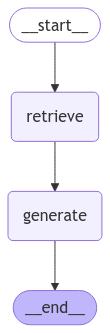

In [44]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### Sequence 활용

In [45]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [47]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [48]:
sequence_graph = sequence_graph_builder.compile()

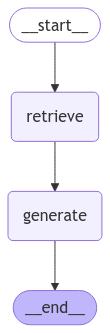

In [49]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [50]:
initial_state = {'query': query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(id='d33c7f26-c912-498e-baf6-cb3628a2fcf5', metadata={'source': './documents/income_tax.txt'}, page_content='나. 사유제<2014. 12. 23.>\n다. 사망할 때까지 연금수령하는 대통령령으로 정하는 중심계좌에 따라 받는 연금소득에 대해서는 100분의 4\n5) 제20조제3제1항제2호에 따라 퇴직소득을 연금수령하는 연금소득에 대해서는 다음 각 목의 구분에 따른 세율. 이 경우 연금 실지 수령액 및 연금수령 원천징수세율의 구체적인 내용은 대통령령으로 정한다.\n    가. 연금 실지 수령범위가 10년 이하인 경우: 연금수령 원천징수세율의 100분의 70\n    나. 연금 실지 수령범위가 10년을 초과하는 경우: 연금수령 원천징수세율의 100분의 60\n6. 기타소득에 대해서는 다음과 같다. 다만, 제8호를 적용받는 경우는 제외한다.\n    가. 제14조제3항제1호라 하며 마땅히 해당하는 소득금액이 3억원을 초과하는 경우는 초과하는 부분에 대해서는 100분의 30\n7. 제21조제1항제18호 및 제21조에 따른 기타소득에 대해서는 100분의 15\n다. 사유제<2014. 12. 23.>\n나. 그 밖의 기타소득에 대해서는 100분의 20\n8. 퇴직소득에 대해서는 기본세율\n9. 대통령령으로 정하는 봉사료에 대해서는 100분의 5\n사유제<2014. 12. 31.>\n10. 제18조의2를 불부하고 다음 각 호의 이자소득 및 배당소득에 대해서는 다음 각 호에 정하는 세율을 원천징수세율로 한다. \n    - 가) 제7조 제1항 제2호 및 제142조의2에 따라 법인부문 부종으로 발생하는 이자소득에 대해서는 100분의 14\n11. 통신령금으로 정하는 실질이 확인되지 아니하는 소득에 대해서는 100분의 45. 다만, ‘금융실명거래 및 비밀보장에 관한 항령 제5조제3항의 경우에는 같은 조